# Big Data Mart Sales Problem

##### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

###### The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

### Import all Needed libraries

In [1]:
#import numpy,pandas,matplotlib,seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings 
import warnings
warnings.filterwarnings('ignore')

##### Import Dataset for model training

In [2]:
df=pd.read_csv('big_data_market_train.csv')

In [3]:
df.shape

(8523, 12)

Here 8523 rows and 12 columns are there for Training model

##### Import Dataset for model testing

In [4]:
df_test=pd.read_csv('big_data_market_test.csv')

In [5]:
df_test.shape

(5681, 11)

Here 5681 rows and 11 columns are there for model testing(Only Independent variables are here) 

In [6]:
#print top 5 rows 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### About the Columns:

###### 1.Item_Identifier

In this column contain the unique code for each item and it is also called as item identity.

###### 2.Item Weight

In this column contain the item weight.

###### 3.Item_Fat_Content

In this column contain the fat content present in item.

###### 4.Item_Visibility

In this column contain the item visibility.

###### 5.Item_Type

In this column contain the type of item like hard drink,cold drink and more.

###### 6.Item_MRP

In this column contain the MRP(price) of item.

###### 7.Outlet_Identifier

In this column contain the item outlet identity.

###### 8.Outlet_Establishment_Year

In this column contain the outlet establishment year.

###### 9.Outlet_size

In this column contain size of the outlet.

###### 10.Outlet_Location_Type

In this column contain the location type of outlet.

###### 11.Outlet_Type

In this column contain the type of Outlet. 

###### 12.Item_Outlet_Sales

In this column contain the item outlet sales And It is the Target column(variable).

## Exploratory Data Analysis(EDA)

##### Checking Shape of Titanic dataframe

In [9]:
df.shape

(8523, 12)

8523 rows and 12 columns are there.

##### Checking Datatype

In [10]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

If you observe here Item identifier,item fat content,item type,outlet identifier outlet size,ourlet location type,outlet type  columns are object type.Item weight item ,visibility ,item MRP,outlet establishment year,iem outlet sales columns are integer and float type.

##### checking space in data

In [11]:
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item

If you observe here there is no spaces in data frame.

##### Checking Null Values in DataFrame

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

If you observe here 1463 null values in item weight column and 2410 null values in outlet type column.

<AxesSubplot:>

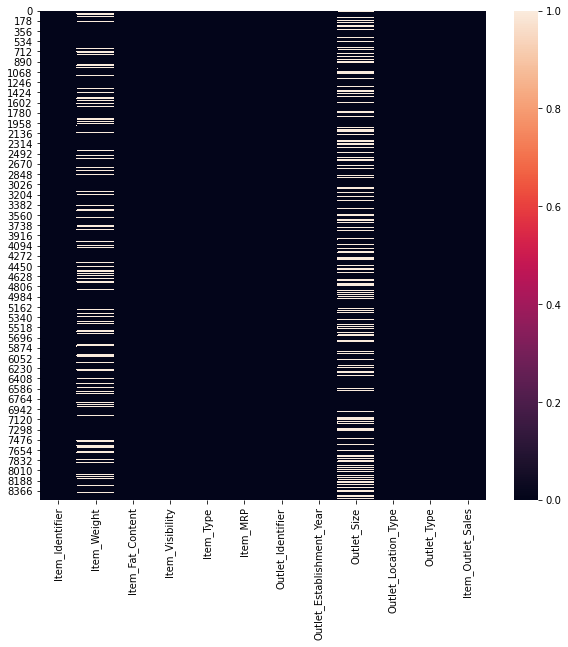

In [13]:
#checking null values in heatmap
plt.figure(figsize=(10,9))
sns.heatmap(df.isnull())

##### Handle the null values

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
#there null values in item weight and outlet_size
#datatype for this 2 columns
print(df['Item_Weight'].dtypes)
print(df['Outlet_Size'].dtypes)

float64
object


Item_Weight:-float64

Outlet_Size:-object

In [16]:
imp_float=SimpleImputer(strategy='mean')
imp_object=SimpleImputer(strategy='most_frequent')

In [17]:
df['Item_Weight']=imp_float.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [18]:
df['Outlet_Size']=imp_object.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [19]:
#checking null values after applying SimpleImputer
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

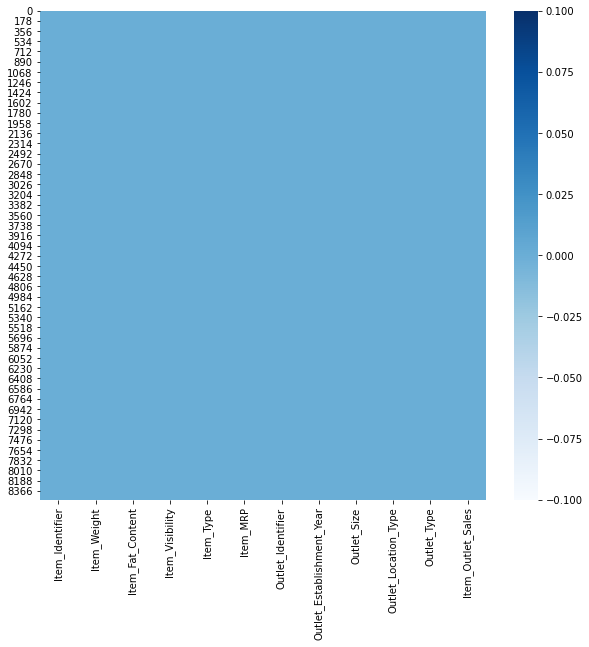

In [20]:
#checking null values using null values
plt.figure(figsize=(10,9))
sns.heatmap(df.isnull(),cmap='Blues')

Now there is no null values in dataset.

###### Checking Information of DataFrame

In [21]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###### Observations:

1. 8523 entries( 0 to 8522).
2. 12 Data columns (total 12 columns).
3. No Null values in all columns. 
4. There are 4 float64 dtypes.
5. Only one int64.
6. seven objects are there.
7. memory usage is 799.2+ KB

##### Checking Unique values and count those values in some variables

In [22]:
#checking unique values
print(df['Item_Identifier'].unique())
#counting the unique values
print(df['Item_Identifier'].value_counts)

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
<bound method IndexOpsMixin.value_counts of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>


If you observe here each item has each unique ID.

In [23]:
#checking unique values
print(df['Item_Fat_Content'].unique())
#counting those unique values
df['Item_Fat_Content'].value_counts()

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

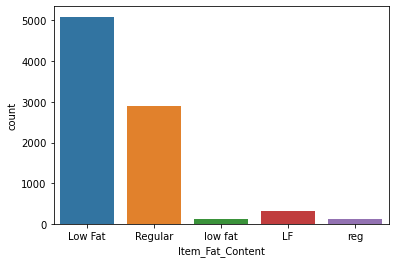

In [24]:
#draw a plot using countplot
sns.countplot(df['Item_Fat_Content'])

##### Pie Chart

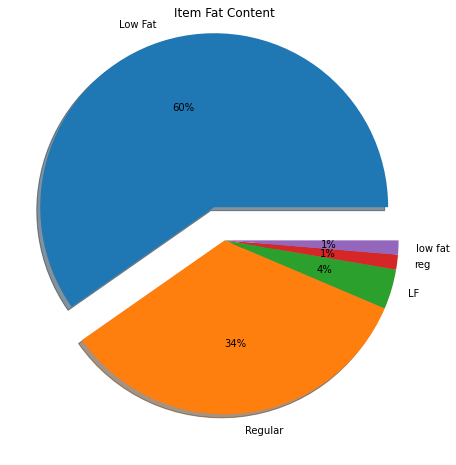

In [25]:
#pie chart for item fat content
label=('Low Fat','Regular','LF','reg','low fat')
y=df['Item_Fat_Content'].value_counts()

plt.figure(figsize=(9,8))
myexplode=[0.2,0,0,0,0]
plt.title('Item Fat Content')
plt.pie(y,labels=label,shadow=True,explode=myexplode,autopct="%.0f%%",)
plt.show()

If you observe here 60% of items are low fat

In [26]:
#checking unique values
print(df['Item_Type'].unique())
#counting the those unique values
df['Item_Type'].value_counts()

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

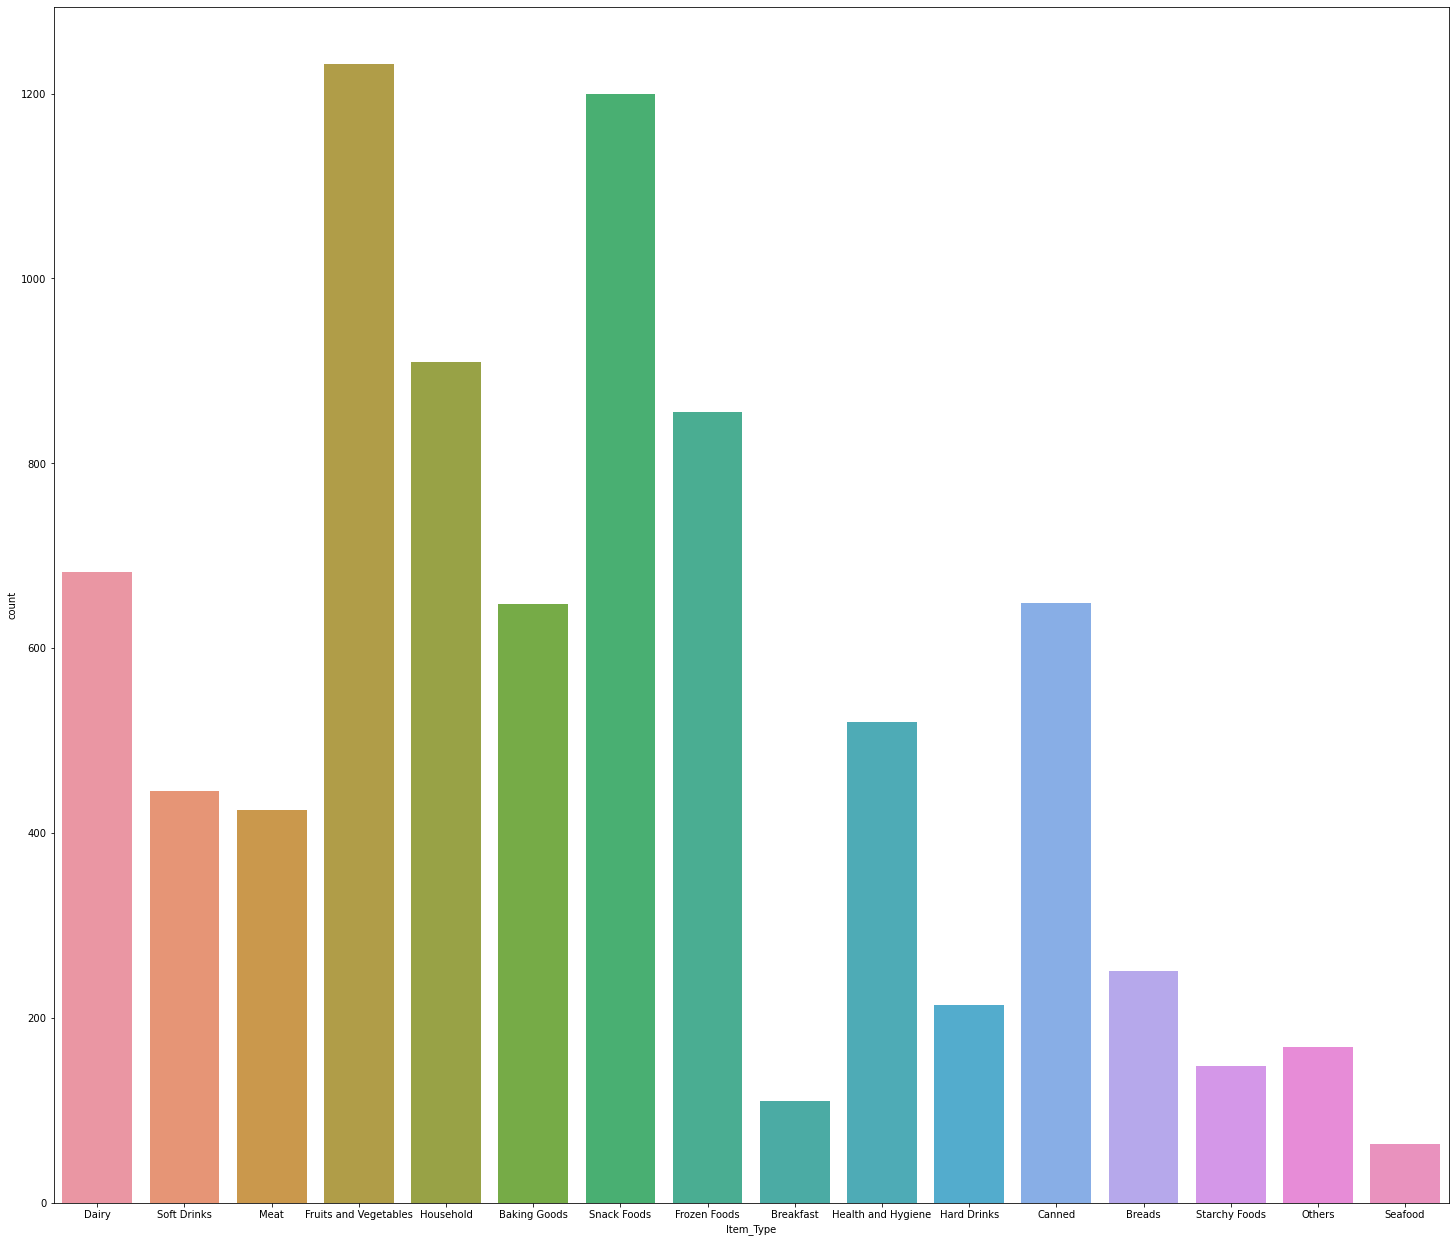

In [27]:
#plot the countplot
plt.figure(figsize=(25,22))
sns.countplot(df['Item_Type'])

If you observe here Fruits and vegetables & Snack foods items are many here.

###### Pie Chart

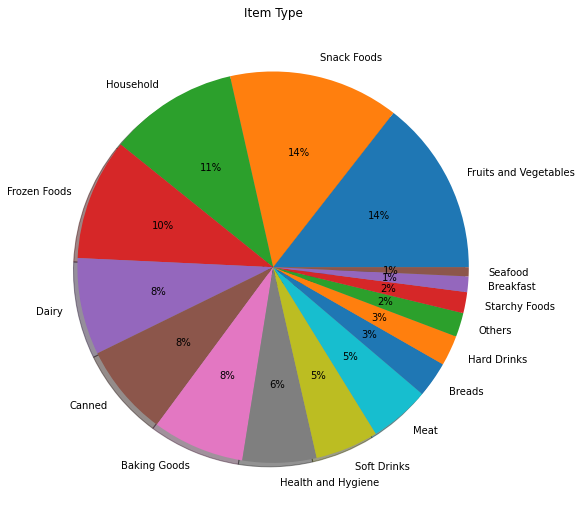

In [28]:
#labels
label=('Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood')

#values
y=df['Item_Type'].value_counts()

#plot pie chart
plt.figure(figsize=(10,9))
plt.title('Item Type')
plt.pie(y,labels=label,shadow=True,autopct='%.0f%%')
plt.show()

If you observe here fruits and vegetables & Snack foods are 14% occupation

In [29]:
#checking unique values
print(df['Outlet_Identifier'].unique())
#counting those unique values or outlet identifiers
df['Outlet_Identifier'].value_counts()

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

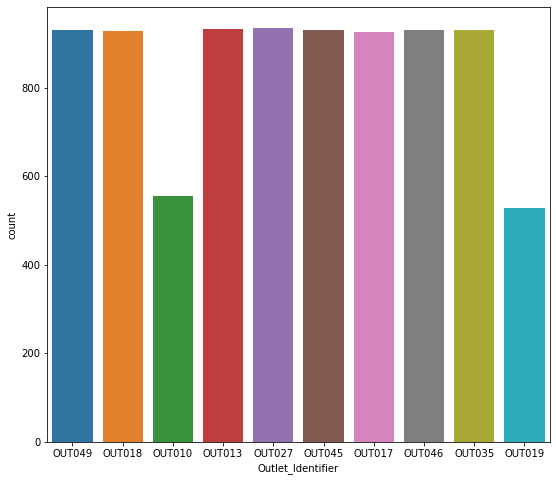

In [30]:
#plot countplot for value counts
plt.figure(figsize=(9,8))
sns.countplot(df['Outlet_Identifier'])

Execpt OUT010 and OUTO19 all are equal samples.

###### Pie Chart

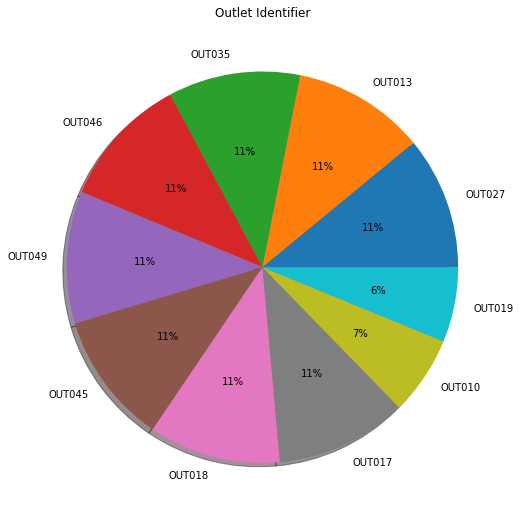

In [31]:
#labels
label=('OUT027','OUT013','OUT035','OUT046','OUT049','OUT045','OUT018','OUT017','OUT010','OUT019')
#values
y=df['Outlet_Identifier'].value_counts()

#plot the pie chart
plt.figure(figsize=(10,9))
plt.title('Outlet Identifier')
plt.pie(y,labels=label,autopct='%.0f%%',shadow=True)
plt.show()

If you observe here all are 11% execpt OUT010,OUT019.

In [32]:
#checking unique values
print(df['Outlet_Establishment_Year'].unique())
#counting those unique values
df['Outlet_Establishment_Year'].value_counts()

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

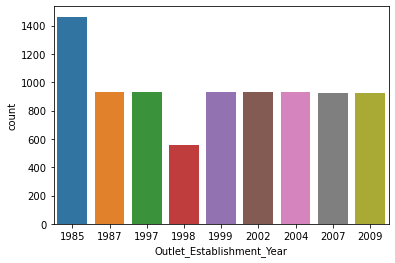

In [33]:
#plot countplot
sns.countplot(df['Outlet_Establishment_Year'])

many of outlets are established in 1985 and 1998 are low establishment outlets.

###### Pie Chart

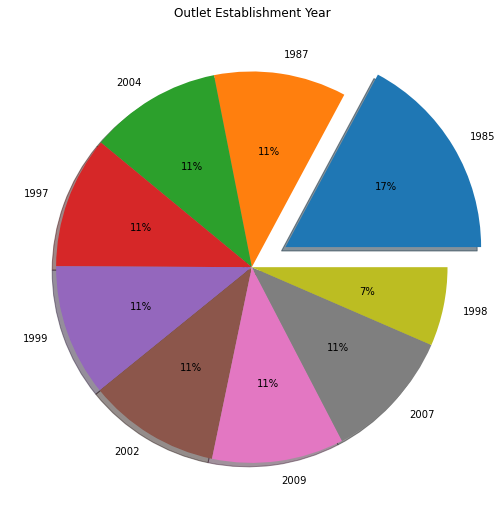

In [34]:
#labels
label=('1985','1987','2004','1997','1999','2002','2009','2007','1998')
#values
y=df['Outlet_Establishment_Year'].value_counts()
#explode
myexplode=[0.2,0,0,0,0,0,0,0,0]

#pie chart
plt.figure(figsize=(10,9))
plt.title('Outlet Establishment Year')
plt.pie(y,labels=label,shadow=True,autopct='%.0f%%',explode=myexplode)
plt.show()

If you observe here in the year of 1985 establishment is 17% this is the highest %. 

In [35]:
#checking unique values
print(df['Outlet_Size'].unique())
#counting those unique values
df['Outlet_Size'].value_counts()

['Medium' 'High' 'Small']


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

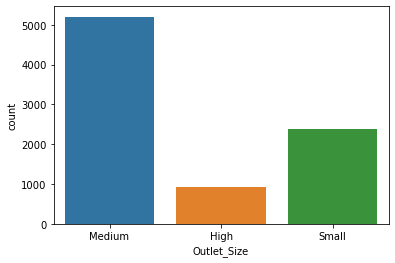

In [36]:
#plot countplot
sns.countplot(df['Outlet_Size'])

If you observe here maximum outlet sizes are medium.

###### Pie Chart

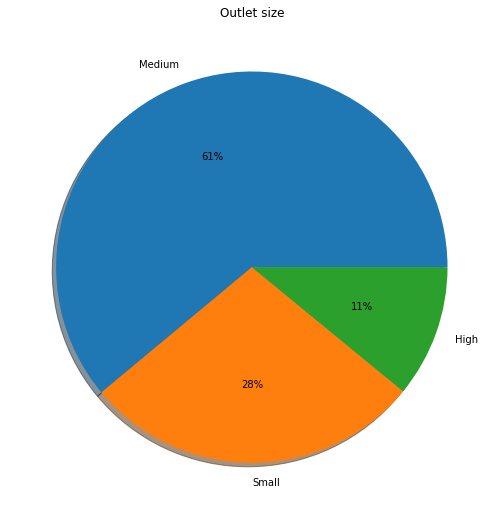

In [37]:
#labels
label=('Medium','Small','High')
#values
y=df['Outlet_Size'].value_counts()

#pie chart
plt.figure(figsize=(10,9))
plt.title('Outlet size')
plt.pie(y,labels=label,shadow=True,autopct='%.0f%%')
plt.show()

61% of Outlet is Medium only.

In [38]:
#checking unique values
print(df['Outlet_Location_Type'].unique())
#counting those unique values
df['Outlet_Location_Type'].value_counts()

['Tier 1' 'Tier 3' 'Tier 2']


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

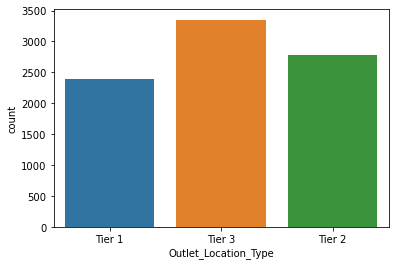

In [39]:
#plot countplot
sns.countplot(df['Outlet_Location_Type'])

If you observe here many of outlets in Tier 3 and low in Tier 1.

###### Pie Chart

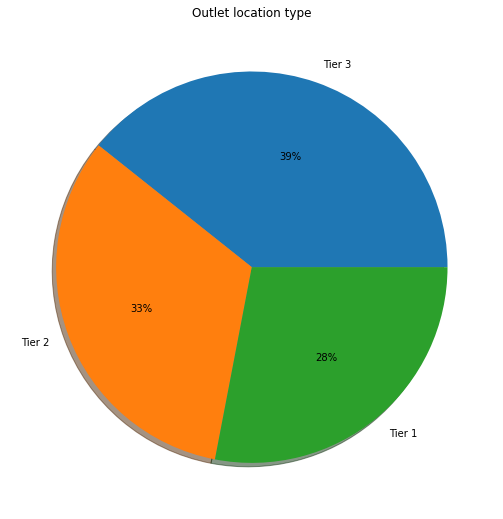

In [40]:
#labels
label=('Tier 3','Tier 2','Tier 1')
#values
y=df['Outlet_Location_Type'].value_counts()

#pie chart
plt.figure(figsize=(10,9))
plt.title('Outlet location type')
plt.pie(y,labels=label,shadow=True,autopct='%.0f%%')
plt.show()

Tier 3 is the 39% highest Tiers in Outlet location. 

In [41]:
#checking unique values
print(df['Outlet_Type'].unique())
#counting those unique values
df['Outlet_Type'].value_counts()

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

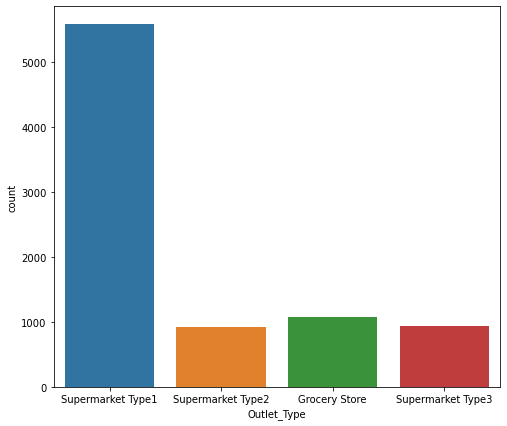

In [42]:
#plot countplot
plt.figure(figsize=(8,7))
sns.countplot(df['Outlet_Type'])

If you observe here many of outlets are Supermarket Type1.

###### Pie Chart

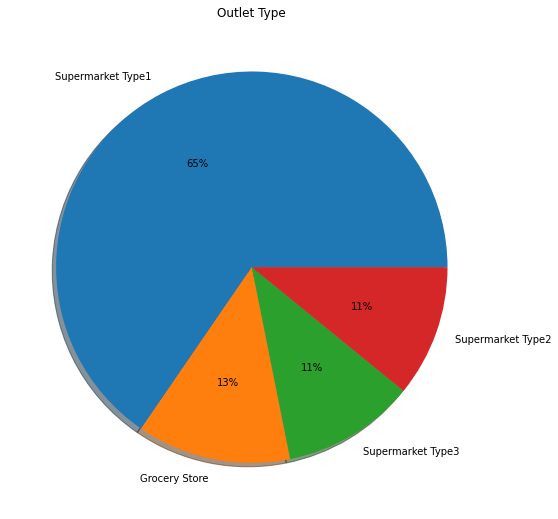

In [43]:
#labels
label=('Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2')
#values
y=df['Outlet_Type'].value_counts()

#pie chart
plt.figure(figsize=(10,9))
plt.title('Outlet Type')
plt.pie(y,labels=label,shadow=True,autopct='%.0f%%')
plt.show()

65% is the highest percentage Supermarket Type1  

##### Apply label encoder for object variables 

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [46]:
list1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [47]:
#change object to int32
label=LabelEncoder()
for x in list1:
    df[x]=label.fit_transform(df[x])

In [48]:
#check dtype after applying label encoder
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

Now all variables are integer type.

In [49]:
#check dataframe after applying label encoder
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Summary Statistics

In [50]:
#describe dataframe
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


##### Observations:

1. All variables are 8523 entries.
2. There is different scale of values here, we need to use standardscaler for make data in standard scale.
3. There is little bit skewness item_fat_content ,item type,item MRP,Outlet size and outlet type.
4. If you observe 75% and Max there is outliers in item identifier,item weight,item visibility and item MRP.

In [51]:
#checking correlations
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

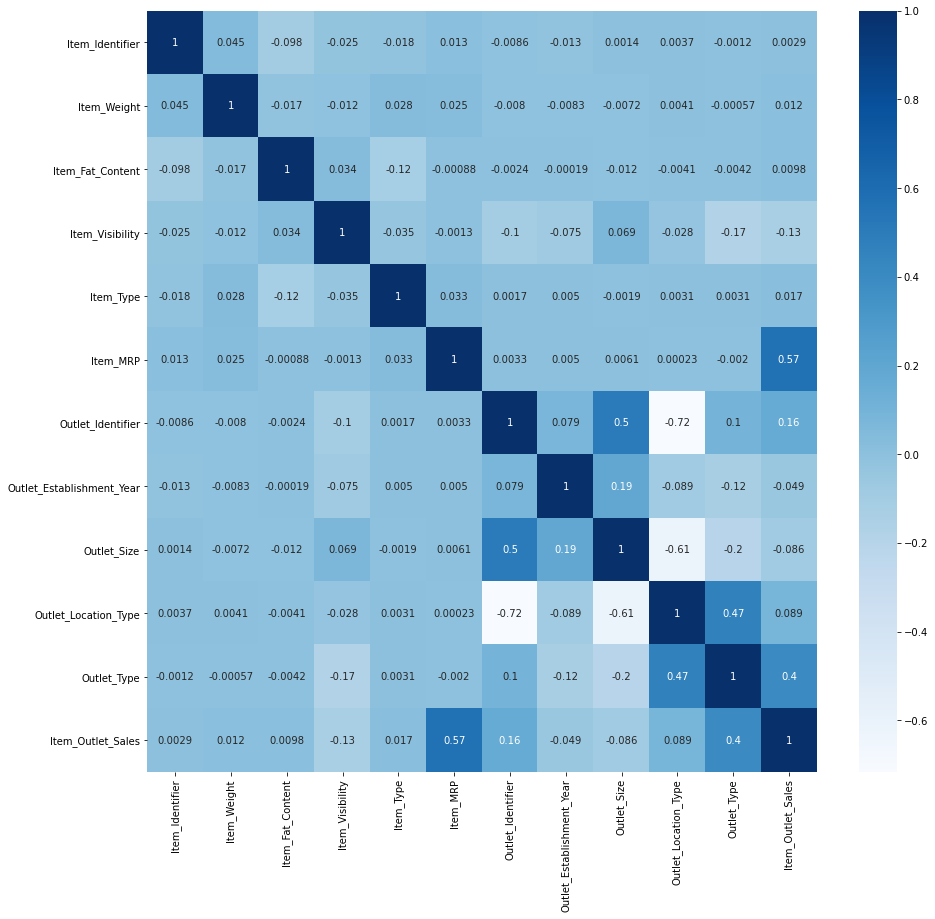

In [52]:
#using heatmap checking correlation of dataframe
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

##### Observations:

1. There is -0.72 correlation for outlet location type and outlet identifier . That means high negtive corrleation b/w them.
2. There is -0.61 correlation b/w the outlet location type and outlet size .High negtive correlation b/w them.
3. There is 0.5 positive correlation b/w outlet identifier and outlet size.
4. There is 0.57 positive corrleation b/w the target variable(item outlet sales) and item MRP.
5. There is -0.13 negtive correlation b/w the item visibility and target variable(item outlet sales).

#### Checking correlation b/w target variable and others

In [53]:
df_corr_target=df.corr()

In [54]:
df_corr_target['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Outlet_Location_Type         0.089367
Item_Type                    0.017048
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Identifier              0.002869
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

##### Observations:

1. Item MRP and Outlet Type is good correlation with target variable.
2. Item Visibility are high Negtive correlation with target variable

### Scattor Plots

In [55]:
sns.set_theme()

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

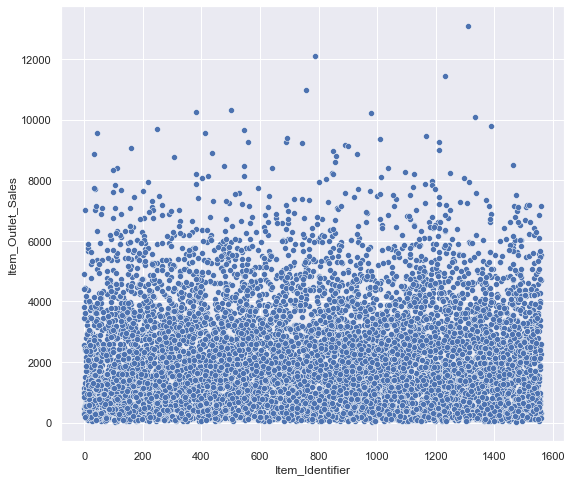

In [56]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Item_Identifier',y='Item_Outlet_Sales',data=df)

If you observe here item identifier is idle.

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

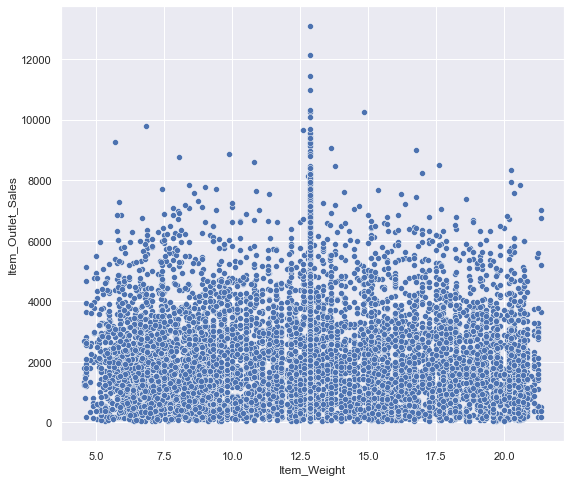

In [57]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

If you observe here 13 weight is the highest outlet sales.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

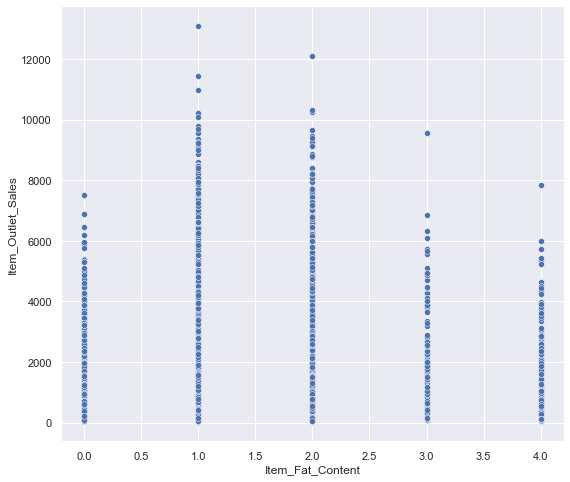

In [58]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

If you observe here 1.0 (Low Fat) and 2.0 (Regular) is the highest outlet sales.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

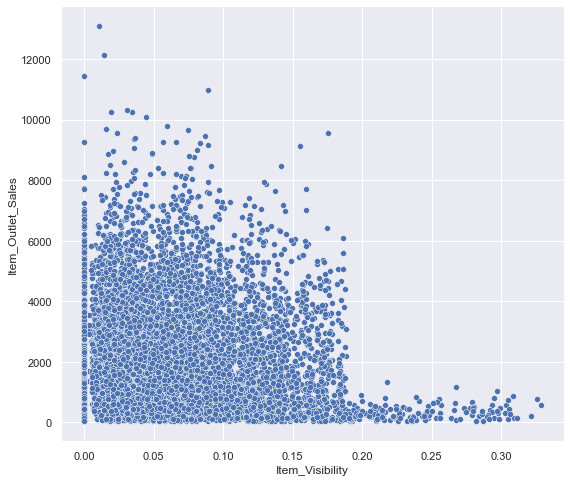

In [59]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

Most of the outlet sales are 0 to 0.20

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

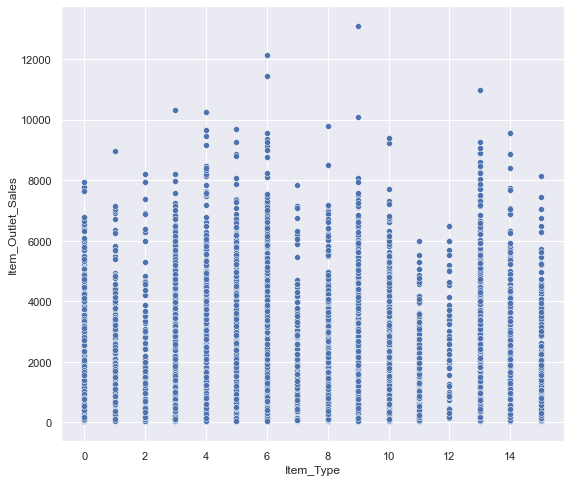

In [60]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Item_Type',y='Item_Outlet_Sales',data=df)

If you observe here 11(Others) and 12(Seafood) is low outlet sales.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

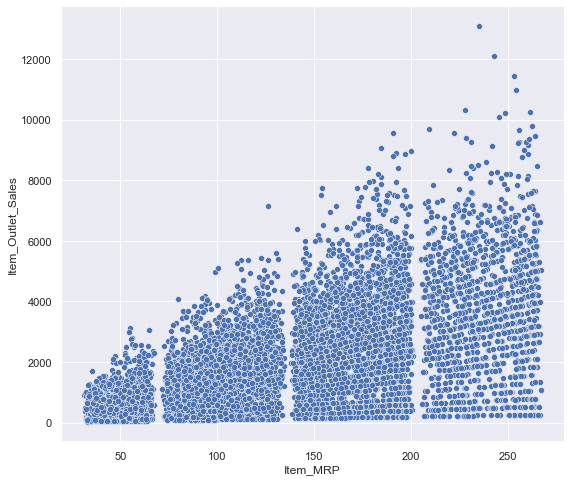

In [61]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

If the MRP is increase means Item Outlet sales are also increase and also most of the 250 Item MRP there is chance of high outlet sales.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

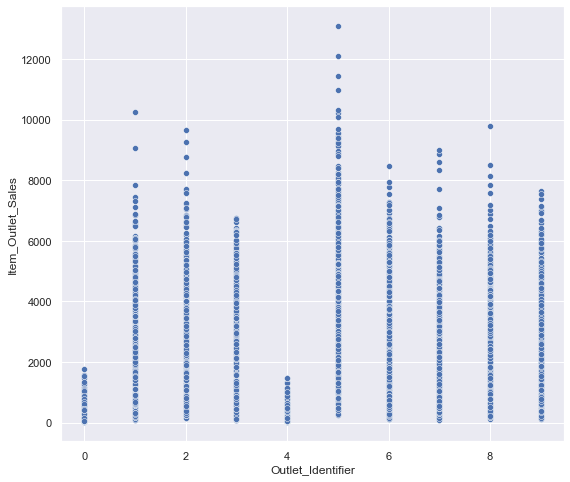

In [62]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

If you observe here 5(OUT027) is the high item outlet sales and 4 (OUT019) outlet is the low Outlet sales.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

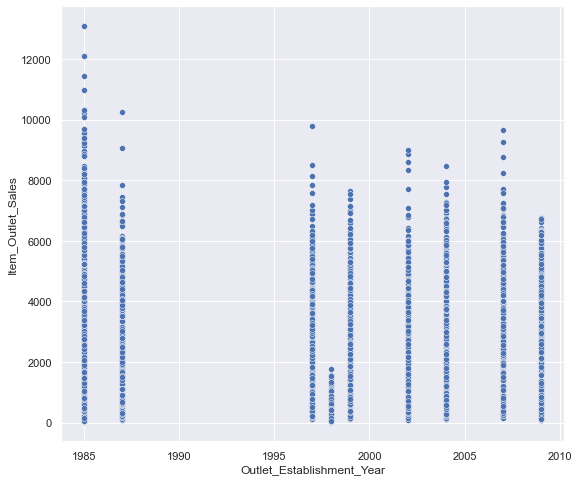

In [63]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

1985 is the high outlet sales beacuse many of the outlets are established in 1985.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

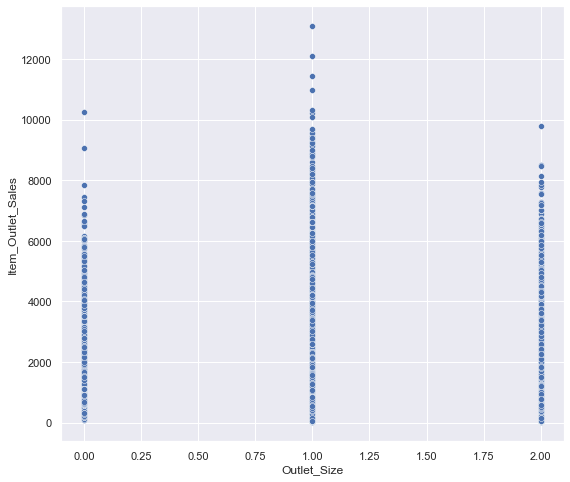

In [64]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

Most of the Outlet sales are in 1(Medium Size).

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

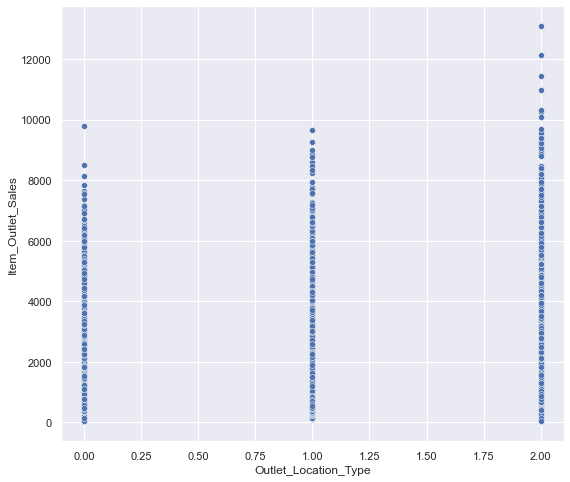

In [65]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

If you observe here highest item outlet sales in 2(Tier 3).

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

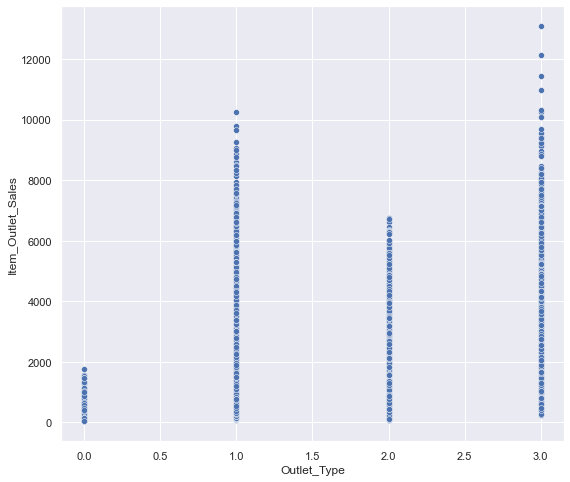

In [66]:
#scattor plot
plt.figure(figsize=(9,8))
sns.scatterplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

highest item Outlet sales in 3.0(Supermarket Type3).

### Pair Plot

<Figure size 1080x1008 with 0 Axes>

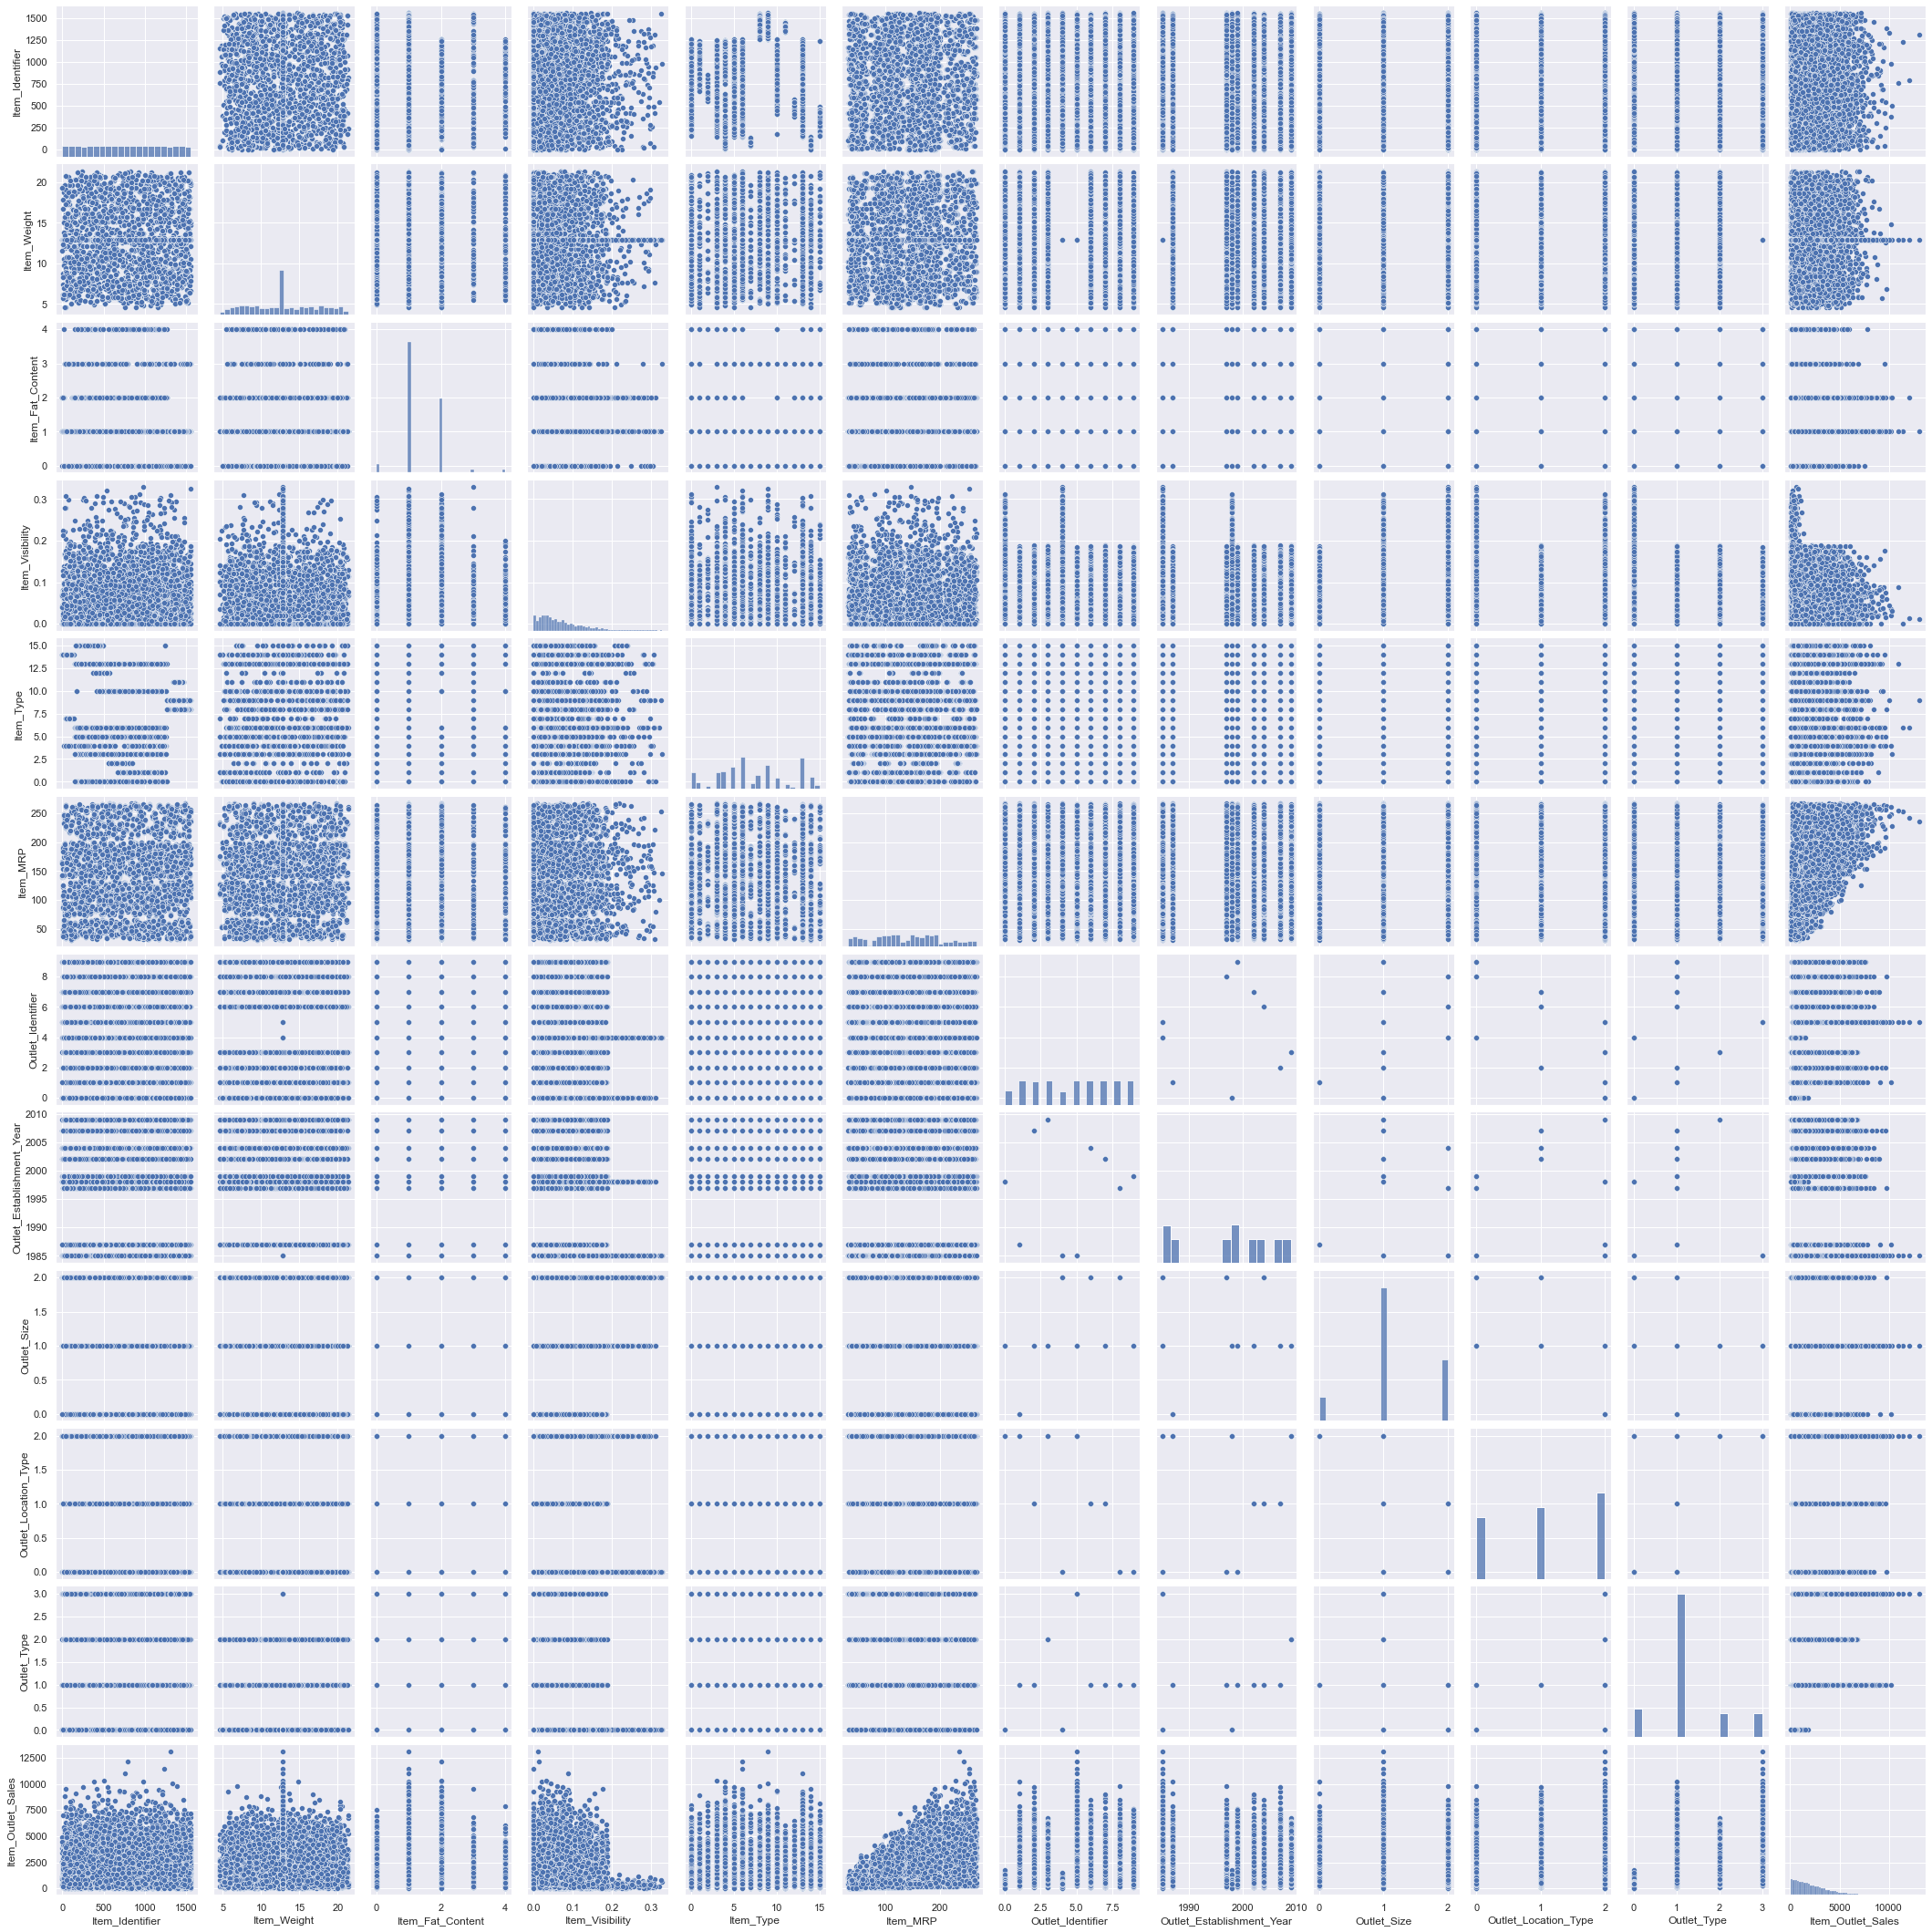

In [67]:
plt.figure(figsize=(15,14))
sns.pairplot(df)

### Checking outliers

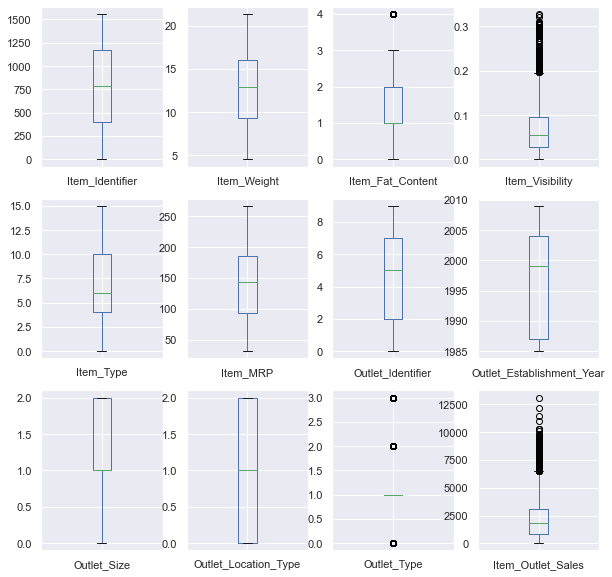

In [68]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))
plt.show()

if you observe here item outlet sales and item visibility are many outliers

### Checking skewness

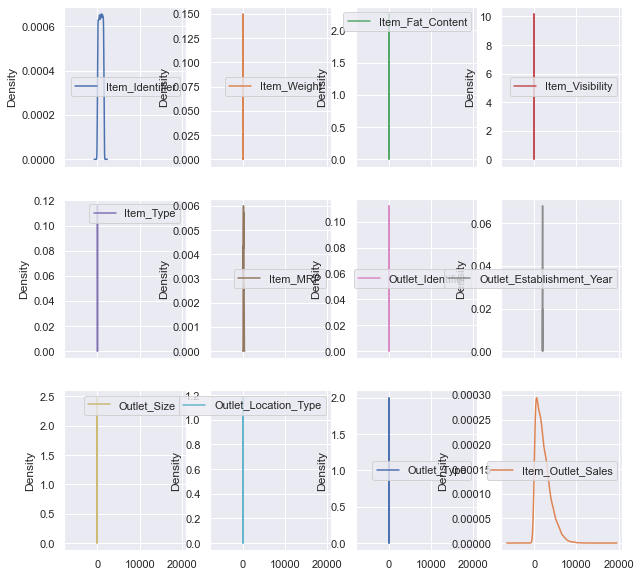

In [69]:
df.plot(kind='kde',subplots=True,layout=(3,4),figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

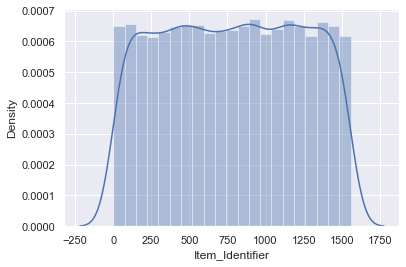

In [70]:
sns.distplot(df['Item_Identifier'])

## Data Cleansing

###### Removing Outliers

In [71]:
from scipy.stats import zscore 

In [72]:
z=np.abs(zscore(df))

In [73]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [74]:
#checking outliers by using row and column
z[49][3]

3.668255029958881

In [75]:
df_new=df[(z<3).all(axis=1)]

In [76]:
df_new.shape

(8222, 12)

After removing outliers 8222 rows are there.

In [77]:
df.shape

(8523, 12)

Before removing outliers 8523 rows are there.

In [78]:
df=df_new

### Removing Skewness

In [79]:
from scipy.stats import boxcox

In [80]:
df['Item_Outlet_Sales']=boxcox(df['Item_Outlet_Sales'],0)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

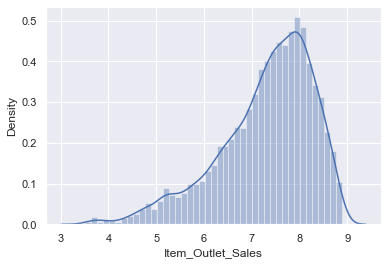

In [82]:
#after removing skewness 
sns.distplot(df['Item_Outlet_Sales'])

### VIF(Variance Inflation Factor)

In [83]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [84]:
x.shape

(8222, 11)

In [85]:
y.shape

(8222,)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [89]:
vif()

,Variables,VIF Factor
0,Item_Identifier,4.051112
1,Item_Weight,10.186728
2,Item_Fat_Content,6.678151
3,Item_Visibility,2.890933
4,Item_Type,4.041505
5,Item_MRP,6.144651
6,Outlet_Identifier,15.614747
7,Outlet_Establishment_Year,63.280180
8,Outlet_Size,7.840381
9,Outlet_Location_Type,16.614472


###### Observations:

1. Item identifier and item type is same VIF, So drop the Item Identifier variable.
2. Item MRP and Item Fat Content also same VIF,So drop the Item MRP variable.

In [90]:
df.drop('Item_Identifier',inplace=True,axis=1)

In [93]:
df.drop('Item_MRP',inplace=True,axis=1)

In [94]:
#Item Visibility is negtivily correlation with Item Outlet Sales
#So drop the Item Visibility variable
df.drop('Item_Visibility',inplace=True,axis=1)

### Standard Scaler

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
x=df.iloc[:,0:-1]

In [98]:
x.shape

(8222, 8)

In [99]:
y=df.iloc[:,-1]

In [100]:
y.shape

(8222,)

In [101]:
scale=MinMaxScaler()

In [102]:
x=scale.fit_transform(x)

In [105]:
#after appling MinMaxScaler
x.shape

(8222, 8)

### Model Selection Process

In [129]:
#import needed libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#model selection
from sklearn.model_selection import train_test_split

### Cross Validation

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rfr=RandomForestRegressor()

In [126]:
list1=[lr,dtr,knr,svr,rfr]

In [127]:
for model in list1:
    score=cross_val_score(model,x,y,cv=10)
    print(model)
    print(score)
    print(score.mean())

LinearRegression()
[0.30970372 0.29247219 0.29576001 0.30589237 0.269942   0.32411042
 0.2833271  0.28074224 0.37118394 0.32501061]
0.3058144609437999
DecisionTreeRegressor()
[ 0.20280914  0.02618153  0.02028894  0.10293254 -0.03231332  0.05452482
 -0.02978672 -0.0166281   0.10634141  0.19630569]
0.06306559284544619
KNeighborsRegressor()
[0.34570459 0.27172997 0.29582405 0.34822453 0.29803193 0.35487939
 0.29243525 0.32755441 0.37803664 0.34627719]
0.32586979555880413
SVR()
[0.40036761 0.41472967 0.37679444 0.45775516 0.39499305 0.46705585
 0.41657719 0.41687351 0.48731618 0.42580823]
0.4258270878362702
RandomForestRegressor()
[0.43868427 0.38335992 0.40749296 0.43173948 0.36156672 0.48200383
 0.38557694 0.39785212 0.47801661 0.46930309]
0.42355959379603475


###### Train Test Split

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=43)

In [131]:
x_train.shape

(5508, 8)

In [132]:
x_test.shape

(2714, 8)

In [133]:
y_train.shape

(5508,)

In [134]:
y_test.shape

(2714,)

In [137]:
for model in list1:
    model.fit(x_train,y_train)
    print(model)
    print(model.score(x_train,y_train))

LinearRegression()
0.3144012196471261
DecisionTreeRegressor()
0.9015199945037183
KNeighborsRegressor()
0.5488075039779611
SVR()
0.4555575451865064
RandomForestRegressor()
0.8424743270228576


### Metrics

In [143]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import mean_squared_log_error,mean_poisson_deviance

In [139]:
pred=dtr.predict(x_test)

In [145]:
print('mean_absolute_error:-',mean_absolute_error(pred,y_test))
print('mean_squared_error:-',mean_squared_error(pred,y_test))
print('r2_score:-',r2_score(pred,y_test))

print('mean_squared_log_error:-',mean_squared_log_error(pred,y_test))
print('mean_poisson_deviance:-',mean_poisson_deviance(pred,y_test))

mean_absolute_error:- 0.7468213117901763
mean_squared_error:- 0.916400097426967
r2_score:- -0.024667552999285913
mean_squared_log_error:- 0.014926478340727519
mean_poisson_deviance:- 0.13335870476729308


### Save model

In [179]:
import joblib

In [180]:
#save model
joblib.dump(dtr,'market_sales_dtr.obj')

['market_sales_dtr.obj']

In [182]:
#load the model
load_dtr=joblib.load('market_sales_dtr.obj')

### Test the model  

In [186]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [189]:
df_test.drop('Item_Identifier',inplace=True,axis=1)
df_test.drop('Item_MRP',inplace=True,axis=1)
df_test.drop('Item_Visibility',inplace=True,axis=1)

In [192]:
df_test.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Type                     object
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [193]:
list4=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [195]:
for x in list4:
    df_test[x]=label.fit_transform(df_test[x])

In [199]:
df_test.isnull().sum()

Item_Weight                  976
Item_Fat_Content               0
Item_Type                      0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [201]:
df_test['Item_Weight']=imp_float.fit_transform(df_test['Item_Weight'].values.reshape(-1,1))

In [202]:
df_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [204]:
#testing the given testing dataframe
load_dtr.predict(df_test)

array([8.82003814, 8.82003814, 4.98686159, ..., 8.82003814, 8.82003814,
       8.82003814])